In [1]:
import argparse
import os

import cv2
import pytesseract
from PIL import Image
from skimage.filters import threshold_adaptive

from imutils import *
from transform import four_point_transform

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)


In [3]:
img = cv2.imread('biz_card.jpg')
orig = img.copy()

# Greyscale image

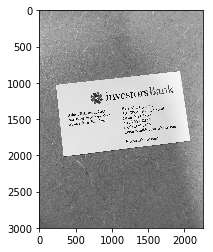

In [4]:
greyimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(greyimg, cmap='gray')

# Gaussian blur image

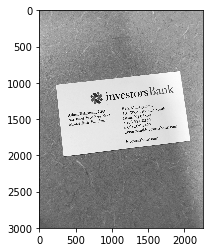

In [5]:
gbimg = cv2.GaussianBlur(greyimg, (5,5), 0 )
plt.imshow(gbimg, cmap='gray')

# Straighten

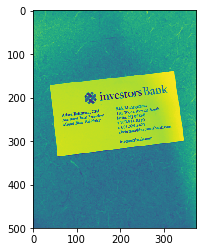

In [6]:
ratio = gbimg.shape[0] / 500.0
gbimg = resize(gbimg, height=500)
edged = cv2.Canny(gbimg, 75, 200)
plt.imshow(gbimg)

peri:981.8477599620819
approx:4


C:\Users\ABehrman\AppData\Local\Continuum\anaconda3\envs\mv\lib\site-packages\skimage\filters\thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
C:\Users\ABehrman\AppData\Local\Continuum\anaconda3\envs\mv\lib\site-packages\skimage\filters\thresholding.py:224: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


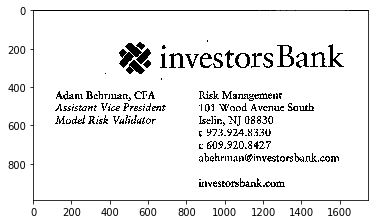

In [7]:
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1:]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    print('peri:{}'.format(peri))
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    print('approx:{}'.format(len(approx)))

    # if our approximated contour has four points, then we
    # can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

# show the contour (outline) of the piece of paper
#print
#"STEP 2: Find contours of paper"
#cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
#cv2.imshow("Outline", image)
#cv2.waitKey(5000)
#cv2.destroyAllWindows()

# apply the four point transform to obtain a top-down
# view of the original image
warped = four_point_transform(img, screenCnt.reshape(4, 2) * ratio)

# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
warped = threshold_adaptive(warped, 251, offset=10)
warped = warped.astype("uint8") * 255

image = warped

preprocess='thresh'

if preprocess == "thresh":
    image = cv2.threshold(image, 0, 255,
                          cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
elif preprocess == "blur":
    image = cv2.medianBlur(image, 3)
    
plt.imshow(image, cmap='gray')

In [2]:
boxes_df = pd.read_csv('templates/biz_card.csv')

In [16]:
box = boxes_df.drop('Unnamed: 0',axis=1).to_dict('records')

In [14]:
import os

In [15]:
os.listdir('documents/')

['AB_biz_card.jpg']

In [39]:
[int(x) for x in box[1]['end'].strip("'").strip("()").split(",")]

[852, 540]

In [40]:
for record in box:
    record['start'] = [int(x) for x in record['start'].strip("'").strip("()").strip('[]').split(",")]
    record['end'] = [int(x) for x in record['end'].strip("'").strip("()").strip('[]').split(",")]

In [41]:
box

[{'end': [863, 479], 'name': 'name', 'start': [104, 411]},
 {'end': [852, 540], 'name': 'title', 'start': [108, 475]},
 {'end': [856, 608], 'name': 'role', 'start': [105, 535]},
 {'end': [1728, 479], 'name': 'group', 'start': [852, 408]}]